In [24]:
# First check location of python install
import sys
print(sys.executable)

# import pyam - IIASA provided package to manipulate IIASA database downloads
import pyam
# import other external packages to store data in an efficient way (pandas) and plot (matplotlib)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import numpy as np
from fair_scm import *
import scipy as sp

from fair_inverse_revised import *

/Users/stuartjenkins/anaconda2/envs/python37/bin/python3


In [2]:
# import the datasets from subfolder "15_degree_compatible_scens_IIASA"
co2_ems_df = pyam.IamDataFrame(data='./15_degree_compatible_scens_IIASA/iamc15_snapshot_co2ems.xlsx', encoding='utf-8')
co2_RF_df = pyam.IamDataFrame(data='./15_degree_compatible_scens_IIASA/iamc15_snapshot_co2rf.xlsx', encoding='utf-8')
total_RF_df = pyam.IamDataFrame(data='./15_degree_compatible_scens_IIASA/iamc15_snapshot_totalrf.xlsx', encoding='utf-8')

# import the datasets from subfolder "15_degree_compatible_scens_IIASA"
two_lower_co2_ems_df = pyam.IamDataFrame(data='./2degree_IIASA_scenarios/iamc15_co2_ems_2lower.xlsx', encoding='utf-8')
two_lower_co2_RF_df = pyam.IamDataFrame(data='./2degree_IIASA_scenarios/iamc15_co2_forcing_2lower.xlsx', encoding='utf-8')
two_lower_total_RF_df = pyam.IamDataFrame(data='./2degree_IIASA_scenarios/iamc15_total_forcing_2lower.xlsx', encoding='utf-8')

# import the datasets from subfolder "15_degree_compatible_scens_IIASA"
two_higher_co2_ems_df = pyam.IamDataFrame(data='./2degree_IIASA_scenarios/iamc15_co2_ems_2higher.xlsx', encoding='utf-8')
two_higher_co2_RF_df = pyam.IamDataFrame(data='./2degree_IIASA_scenarios/iamc15_co2_forcing_2higher.xlsx', encoding='utf-8')
two_higher_total_RF_df = pyam.IamDataFrame(data='./2degree_IIASA_scenarios/iamc15_total_forcing_2higher.xlsx', encoding='utf-8')

# import RCP85 scenario to stitch onto past
RCP85_E = pd.read_csv('./RCP_data/RCP85_EMISSIONS.csv',skiprows=36,index_col=0)
RCP85_RF = pd.read_csv('./RCP_data/RCP85_MIDYEAR_RADFORCING.csv',skiprows=58,index_col=0)

RCP3_E = pd.read_csv('./RCP_data/RCP3PD_EMISSIONS.csv',skiprows=36,index_col=0)
RCP3_RF = pd.read_csv('./RCP_data/RCP3PD_MIDYEAR_RADFORCING.csv',skiprows=58,index_col=0)

RCP45_E = pd.read_csv('./RCP_data/RCP45_EMISSIONS.csv',skiprows=36,index_col=0)
RCP45_RF = pd.read_csv('./RCP_data/RCP45_MIDYEAR_RADFORCING.csv',skiprows=58,index_col=0)

RCP6_E = pd.read_csv('./RCP_data/RCP6_EMISSIONS.csv',skiprows=36,index_col=0)
RCP6_RF = pd.read_csv('./RCP_data/RCP6_MIDYEAR_RADFORCING.csv',skiprows=58,index_col=0)

INFO:root:Reading `./15_degree_compatible_scens_IIASA/iamc15_snapshot_co2ems.xlsx`
INFO:root:Reading `./15_degree_compatible_scens_IIASA/iamc15_snapshot_co2rf.xlsx`
INFO:root:Reading `./15_degree_compatible_scens_IIASA/iamc15_snapshot_totalrf.xlsx`
INFO:root:Reading `./2degree_IIASA_scenarios/iamc15_co2_ems_2lower.xlsx`
INFO:root:Reading `./2degree_IIASA_scenarios/iamc15_co2_forcing_2lower.xlsx`
INFO:root:Reading `./2degree_IIASA_scenarios/iamc15_total_forcing_2lower.xlsx`
INFO:root:Reading `./2degree_IIASA_scenarios/iamc15_co2_ems_2higher.xlsx`
INFO:root:Reading `./2degree_IIASA_scenarios/iamc15_co2_forcing_2higher.xlsx`
INFO:root:Reading `./2degree_IIASA_scenarios/iamc15_total_forcing_2higher.xlsx`


invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c
invalid escape sequence \c


TCR:  1.85 K
ECS:  3.0 K
calculated TCRE:  1.5583423636521299 K/TtC
1163.881270573581


divide by zero encountered in true_divide
the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.


0.3291989383254662
134.57038694727282
TCR:  1.85 K
ECS:  3.0 K
calculated TCRE:  1.4661518929731499 K/TtC
1237.065203740997
TCR:  1.85 K
ECS:  3.0 K
calculated TCRE:  1.4661518929731499 K/TtC
1237.065203740997
TCR:  1.85 K
ECS:  3.0 K
calculated TCRE:  1.5583423636521299 K/TtC
1163.881270573581
TCR:  1.85 K
ECS:  3.0 K
calculated TCRE:  1.5583423636521299 K/TtC
1163.881270573581


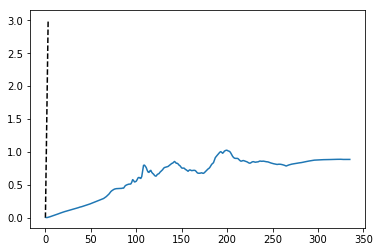

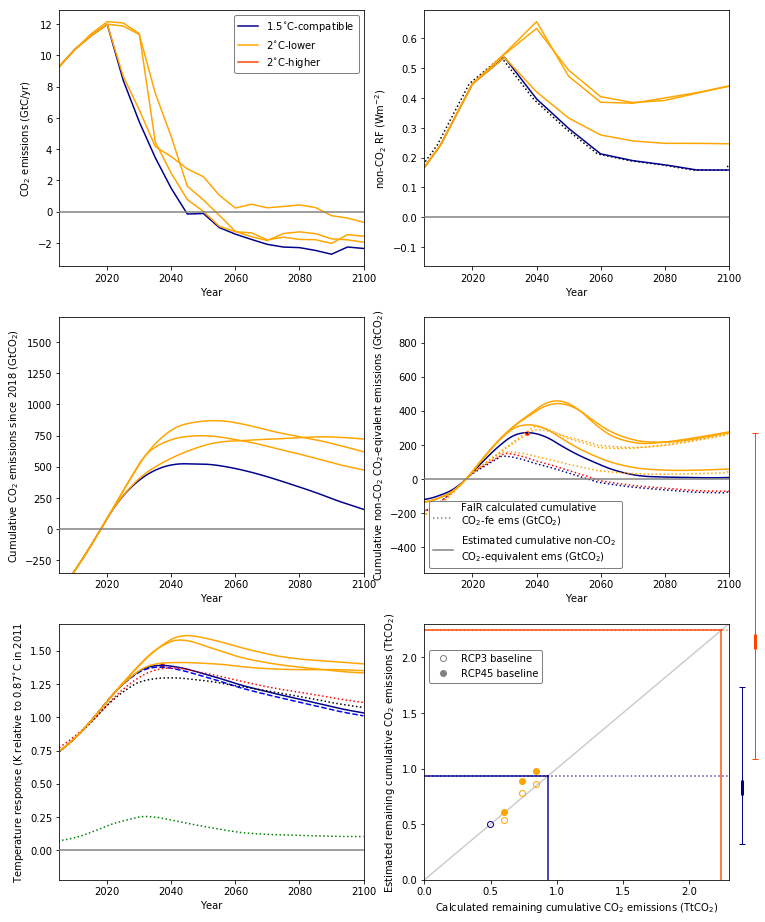

In [56]:
fig2, ax2 = plt.subplots()
ax2.plot([0,3],[0,3], 'k--')

# what is the year we run the comparison from (chosen because we need 20 years of non-CO2 forcing data find F_0)
year_val = 2018
non_co2_forcing_average_over = 15

fbar_s = np.array([])
f0_s = np.array([])
f1_s = np.array([])

# Parameter values
full_index = np.arange(1765,2101)
TCR_val = 1.85
ECS_val = 3.0
d_array = np.array([239.0,4.1])
F_2x = 3.74
C_0 = 278.0
H = 100 # size of integration for AGWP calculation
gamma = 0.88 # (1 - np.exp(-epsilon*H))/(epsilon*H)

# magicc like AGWP value
r0 = 32.4 # 33.6
rC = 0.019 # 0.0206
rT = 4.165 # 4.635

base_ems = RCP3_E.FossilCO2.values + RCP3_E.OtherCO2.values
pulse_ems = RCP3_E.FossilCO2.values + RCP3_E.OtherCO2.values
pulse_ems[year_val-1765] += 1. * 12 / 44

other_rf = RCP3_RF.TOTAL_INCLVOLCANIC_RF.values - RCP3_RF.CO2_RF.values

C_pulse, T_pulse = fair_scm(emissions=pulse_ems, other_rf=other_rf, tcrecs=np.array([TCR_val,ECS_val]), d=d_array, C_0=C_0, F_2x=F_2x, r0=r0, rC=rC, rT=rT)
C_base, T_base = fair_scm(emissions=base_ems, other_rf=other_rf, tcrecs=np.array([TCR_val,ECS_val]), d=d_array, C_0=C_0, F_2x=F_2x, r0=r0, rC=rC, rT=rT)

RF_net = (F_2x * np.log(C_pulse / C_0) / np.log(2.0)) - (F_2x * np.log(C_base / C_0) / np.log(2.0))
AGWP_CO2 = sp.integrate.simps(RF_net[year_val-1765:year_val+101-1765])
TCRE = (((H / AGWP_CO2) * (F_2x / TCR_val)) * (12 / 44000))**-1
print('TCR: ',TCR_val,'K\nECS: ',ECS_val,'K\ncalculated TCRE: ', TCRE, 'K/TtC')
print(H/AGWP_CO2)


# fig, ax = plt.subplots(1,3, figsize=(12,4))
fig1, ax1 = plt.subplots(3,2, figsize=(12,16))
ax1[2,1].plot([0,10],[0,10], color='black', alpha=0.2)
ax1[0,0].set_xlabel('Year')
ax1[0,0].set_ylabel('CO$_2$ emissions (GtC/yr)')
ax1[0,1].set_xlabel('Year')
ax1[0,1].set_ylabel('non-CO$_2$ RF (Wm$^{-2}$)')
ax1[1,1].set_xlabel('Year')
ax1[1,1].set_ylabel('Cumulative non-CO$_2$ CO$_2$-eqivalent emissions (GtCO$_2$)')
ax1[1,0].set_xlabel('Year')
ax1[1,0].set_ylabel('Cumulative CO$_2$ emissions since 2018 (GtCO$_2$)')
ax1[2,0].set_xlabel('Year')
ax1[2,0].set_ylabel('Temperature response (K relative to 0.87$^{\circ}$C in 2011')
ax1[2,1].set_xlabel('Calculated remaining cumulative CO$_2$ emissions (TtCO$_2$)')
ax1[2,1].set_ylabel('Estimated remaining cumulative CO$_2$ emissions (TtCO$_2$)')
ax1[0,0].axhline(y=0, color='grey', zorder=10)
ax1[2,0].axhline(y=0, color='grey', zorder=10)
ax1[0,1].axhline(y=0, color='grey', zorder=10)
ax1[1,1].axhline(y=0, color='grey', zorder=10)
ax1[1,0].axhline(y=0, color='grey', zorder=10)
# ax1[1,1].axhline(y=0, color='grey')
ax1[0,0].set_xlim(2005,2100)
ax1[0,1].set_xlim(2005,2100)
ax1[2,0].set_xlim(2005,2100)
# ax1[2,0].set_ylim(0.5,2.2)
ax1[2,1].set_xlim(0,2.3)
ax1[2,1].set_ylim(0,2.3)
ax1[1,0].set_xlim(2005,2100)
ax1[1,0].set_ylim(-350,1700)
ax1[1,1].set_xlim(2005,2100)
ax1[1,1].set_ylim(-550,950)

for i in [0]: # ,1,3,4,5,6,7]:
    co2_single_model = list(co2_ems_df.models())[i]
    rf_single_model = list(total_RF_df.models())[i]
    co2rf_single_model = list(co2_RF_df.models())[i]
    co2_one_model_df = co2_ems_df.filter(variable='Emissions|CO2', region='World', model=co2_single_model)
    rf_one_model_df = total_RF_df.filter(variable='Forcing', region='World', model=rf_single_model)
    co2rf_one_model_df = co2_RF_df.filter(variable='Forcing|CO2', region='World', model=co2rf_single_model)
    
    for j in range(0,len(list(co2_one_model_df.scenarios()))):
        co2_single_scenario = list(co2_one_model_df.scenarios())[j]
        rf_single_scenario = list(rf_one_model_df.scenarios())[j]
        co2rf_single_scenario = list(co2rf_one_model_df.scenarios())[j]
        co2_one_scenario_df = co2_one_model_df.filter(variable='Emissions|CO2', region='World', model=co2_single_model, scenario=co2_single_scenario)
        rf_one_scenario_df = rf_one_model_df.filter(variable='Forcing', region='World', model=rf_single_model, scenario=rf_single_scenario)
        co2rf_one_scenario_df = co2rf_one_model_df.filter(variable='Forcing|CO2', region='World', model=co2rf_single_model, scenario=co2rf_single_scenario)
        
        x_to_eval = np.arange(co2_one_scenario_df.as_pandas().year.values[0], co2_one_scenario_df.as_pandas().year.values[-1]+1)
        x_current = co2_one_scenario_df.as_pandas().year.values
        co2_y_current = co2_one_scenario_df.as_pandas().value.values
        rf_y_current = rf_one_scenario_df.as_pandas().value.values
        co2rf_y_current = co2rf_one_scenario_df.as_pandas().value.values

        co2_scenario_interp = np.interp(x_to_eval, x_current, co2_y_current)*12.0/44000.0
        rcp_co2_ems = RCP85_E.FossilCO2.loc[:x_to_eval[0]].values + RCP85_E.OtherCO2.loc[:x_to_eval[0]].values
        co2_scale_rcp = co2_scenario_interp[0] / rcp_co2_ems[-1]
        co2_ems_full = np.zeros(x_to_eval.size + rcp_co2_ems[:x_to_eval[0]-1765].size)
        co2_ems_full[:rcp_co2_ems.size] = rcp_co2_ems * co2_scale_rcp
        co2_ems_full[rcp_co2_ems.size-1:] = co2_scenario_interp

        if ('ADVANCE' in co2_single_scenario) & ('AIM' in co2_single_model):
            mask = np.array([True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True])
            rf_scenario_interp = np.interp(x_to_eval, x_current[mask], rf_y_current[mask])
            rcp_rf = RCP85_RF.TOTAL_ANTHRO_RF.loc[:x_to_eval[0]].values
            rf_scale_rcp = rf_scenario_interp[0] / rcp_rf[-1]
            rf_full = np.zeros(x_to_eval.size + rcp_rf[:x_to_eval[0]-1765].size)
            rf_full[:rcp_rf.size] = rcp_rf * rf_scale_rcp
            rf_full[rcp_rf.size-1:] = rf_scenario_interp

            co2rf_scenario_interp = np.interp(x_to_eval, x_current[mask], co2rf_y_current[mask])
            rcp_co2rf = RCP85_RF.CO2_RF.loc[:x_to_eval[0]].values
            co2rf_scale_rcp = co2rf_scenario_interp[0] / rcp_co2rf[-1]
            co2rf_full = np.zeros(x_to_eval.size + rcp_co2rf[:x_to_eval[0]-1765].size)
            co2rf_full[:rcp_co2rf.size] = rcp_co2rf * co2rf_scale_rcp
            co2rf_full[rcp_co2rf.size-1:] = co2rf_scenario_interp
        else:
            rf_scenario_interp = np.interp(x_to_eval, x_current, rf_y_current)
            rcp_rf = RCP85_RF.TOTAL_ANTHRO_RF.loc[:x_to_eval[0]].values
            rf_scale_rcp = rf_scenario_interp[0] / rcp_rf[-1]
            rf_full = np.zeros(x_to_eval.size + rcp_rf[:x_to_eval[0]-1765].size)
            rf_full[:rcp_rf.size] = rcp_rf * rf_scale_rcp
            rf_full[rcp_rf.size-1:] = rf_scenario_interp

            co2rf_scenario_interp = np.interp(x_to_eval, x_current, co2rf_y_current)
            rcp_co2rf = RCP85_RF.CO2_RF.loc[:x_to_eval[0]].values
            co2rf_scale_rcp = co2rf_scenario_interp[0] / rcp_co2rf[-1]
            co2rf_full = np.zeros(x_to_eval.size + rcp_co2rf[:x_to_eval[0]-1765].size)
            co2rf_full[:rcp_co2rf.size] = rcp_co2rf * co2rf_scale_rcp
            co2rf_full[rcp_co2rf.size-1:] = co2rf_scenario_interp

#         ax[0].plot(np.arange(1765,2101), co2_ems_full, color='royalblue')
#         ax[1].plot(np.arange(1765,2101), co2rf_full, color='royalblue')
#         ax[2].plot(np.arange(1765,2101), rf_full, color='royalblue')
        
#         base_ems = co2_ems_full
#         pulse_ems = np.copy(base_ems)
#         pulse_ems[year_val-1765] += 1. * 12 / 44
        
#         other_rf_vals = rf_full-co2rf_full

#         C_pulse, T_pulse = fair_scm(emissions=pulse_ems, other_rf=other_rf_vals, tcrecs=np.array([TCR_val,ECS_val]), d=d_array, C_0=C_0, F_2x=F_2x, r0=r0, rC=rC, rT=rT)
#         C_base, T_base = fair_scm(emissions=base_ems, other_rf=other_rf_vals, tcrecs=np.array([TCR_val,ECS_val]), d=d_array, C_0=C_0, F_2x=F_2x, r0=r0, rC=rC, rT=rT)

#         RF_net = (F_2x * np.log(C_pulse / C_0) / np.log(2.0)) - (F_2x * np.log(C_base / C_0) / np.log(2.0))
#         AGWP_CO2 = sp.integrate.simps(RF_net[year_val-1765:year_val-1765+H+1])
#         TCRE = (((H / AGWP_CO2) * (F_2x / TCR_val)) * (12 / 44000))**-1
        
        # run each scenario through FaIR
        C_run, T_run = fair_scm(emissions=co2_ems_full, other_rf=rf_full-co2rf_full, tcrecs=np.array([TCR_val,ECS_val]), d=d_array, C_0=C_0, F_2x=F_2x, r0=r0, rC=rC, rT=rT)
        
        RF_vals = F_2x * np.log(C_run / C_0) / np.log(2.0)
        ax2.plot(RF_vals/rf_full)
        
        
        
        if T_run[-1] - T_run[-2] <= 0.0:
            other_stuff, E_back = fair_scm_emsback(rf_full-co2rf_full, other_rf=co2rf_full,TCR=TCR_val,ECS=ECS_val,d1=d_array[1],d2=d_array[0],rC=rC,rT=rT,r0=r0,C_0=C_0)
            ax1[1,1].plot(np.arange(1765,2101), (np.cumsum(E_back) - np.cumsum(E_back)[2018-1765])*44./12., linestyle=':', color='darkblue')

            C_test, T_test = fair_scm(emissions=E_back, other_rf=RF_vals, tcrecs=np.array([TCR_val,ECS_val]), d=d_array, C_0=C_0, F_2x=F_2x, r0=r0, rC=rC, rT=rT)
            RF_test = F_2x * np.log(C_test / C_0) / np.log(2.0)
            ax1[0,1].plot(np.arange(1765,2101), RF_test, color='black', linestyle=':')
            ax1[2,0].plot(np.arange(1765,2101), T_test - T_test[2011-1765] + 0.87, color='blue', linestyle ='--')
            
            C_again, T_again = fair_scm(other_rf=rf_full-co2rf_full, tcrecs=np.array([TCR_val,ECS_val]), d=d_array, C_0=C_0, F_2x=F_2x, r0=r0, rC=rC, rT=rT)
            ax1[2,0].plot(np.arange(1765,2101), T_again, color='green', linestyle=':')
            
            # repeat with my inversion function
            C_back_stu = forcing_to_conc(rf_full-co2rf_full)
            E_back_stu, E_back_stu_smooth = conc_to_emissions(C_back_stu, T_run, r0=r0, rC=rC, rT=rT, year_smoothing=2)
            ax1[1,1].plot(np.arange(1765,2101), 44/12*(np.cumsum(E_back_stu) - np.cumsum(E_back_stu)[2018-1765]), color='red', linestyle=':')
            
            
            ax1[0,0].plot(full_index, co2_ems_full, color='darkblue')
            ax1[1,0].plot(full_index, (np.cumsum(co2_ems_full) - np.cumsum(co2_ems_full)[2018-1765])*44./12., color='darkblue')
            ax1[0,1].plot(full_index, rf_full - co2rf_full, color='darkblue')
    #         ax1[2,0].plot(full_index, T_run - np.mean(T_run[1850-1765:1901-1765]), color='darkblue')
            ax1[2,0].plot(full_index, T_run - T_run[2011-1765] + 0.87, color='darkblue')
            
            # find epsilon and carbon budget to temp peak
            non_co2rf_full = rf_full - co2rf_full
            temp_peak_val = np.max(T_run - T_run[2011-1765] + 0.87)
            year_of_temp_peak = full_index[T_run - T_run[2011-1765] + 0.87 == temp_peak_val]
            
            ax1[2,0].scatter(year_of_temp_peak, temp_peak_val, color='red', s=12)
            
            print(temp_peak_val - T_run[2018-1765] + T_run[2011-1765] - 0.87)
            
            epsilon = (ECS_val - TCR_val)/(TCR_val * d_array[0])

            F_bar = np.mean(non_co2rf_full[(full_index < year_of_temp_peak) * (full_index >= (year_val))])
            F_1 = np.mean(non_co2rf_full[(full_index < year_of_temp_peak) * (full_index >= (year_of_temp_peak-non_co2_forcing_average_over))])
            F_0 = np.mean(non_co2rf_full[(full_index < year_val) * (full_index >= (year_val-non_co2_forcing_average_over))])
            
            fbar_s = np.append(fbar_s,F_bar)
            f0_s = np.append(f0_s,F_0)
            f1_s = np.append(f1_s,F_1)
    #         print(F_0, "\t", F_1)
    #         print((epsilon * F_0 * (year_of_temp_peak-year_val))*H*1000/AGWP[H+input_yr])

            G_estimated = ((temp_peak_val-T_run[full_index == year_val]+T_run[2011-1765]-0.87) / TCRE)*1000. - ((gamma * H * (F_1 - F_0 + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*F_bar)) / (AGWP_CO2*44./12.))     
            ax1[1,1].scatter(year_of_temp_peak, (44/12)*((gamma * H * (F_1 - F_0 + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*F_bar)) / (AGWP_CO2*44./12.)), color='red', s=12)
            
            G_calculated = np.sum(co2_ems_full[full_index<=year_of_temp_peak]) - np.sum(co2_ems_full[full_index<=year_val])
            
            print(G_calculated)
            
            ax1[2,1].plot(G_calculated*44/12000, G_estimated*44/12000, 'o', color='darkblue', fillstyle='none')
            
            non_co2_ems_estimate = np.zeros(2101-2005)
            for i in range(0,2101-2005):
                F_bar = np.mean(non_co2rf_full[(full_index < year_of_temp_peak) * (full_index >= (year_val))])
                F_1 = np.mean(non_co2rf_full[(full_index < (i+2005)) * (full_index >= (i+2005-non_co2_forcing_average_over))])
                F_0 = np.mean(non_co2rf_full[(full_index < year_val) * (full_index >= (year_val-non_co2_forcing_average_over))])
                non_co2_ems_estimate[i] = ((gamma * H * (F_1 - F_0 + epsilon*(i+2005-full_index[year_val-full_index[0]])*F_bar)) / (AGWP_CO2*44./12.)) 
            ax1[1,1].plot(np.arange(2005,2101), non_co2_ems_estimate*44./12., color='darkblue')
            
            ax1[2,0].plot(np.arange(2005,2101), 1.04 + TCRE*0.001*(non_co2_ems_estimate + np.cumsum(co2_ems_full)[2005-1765:] - np.cumsum(co2_ems_full)[2018-1765]), color='red', linestyle=':')
            ax1[2,0].plot(np.arange(2005,2101), 1.04 + TCRE*0.001*(np.cumsum(E_back)[2005-1765:] - np.cumsum(E_back)[2018-1765] + np.cumsum(co2_ems_full)[2005-1765:] - np.cumsum(co2_ems_full)[2018-1765]), color='black', linestyle=':')
            
G_estimated = (0.46 / 1.4)*1000. - ((gamma * H * (np.percentile(f1_s - f0_s, 50) + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*np.mean(fbar_s))) / (AGWP_CO2*44./12.))     
ax1[2,1].plot([0,G_estimated*44./12000.],[G_estimated*44./12000.,G_estimated*44./12000.], color='darkblue', linestyle='-', linewidth=2, alpha=0.7)
ax1[2,1].axhline(y=G_estimated*44./12000., color='darkblue', linestyle=':', linewidth=1.5, alpha=0.7)
ax1[2,1].plot([G_estimated*44./12000.,G_estimated*44./12000.],[0,G_estimated*44./12000.], color='darkblue', linestyle='-', linewidth=2, alpha=0.7)
G_estimated = (0.96 / 1.4)*1000. - ((gamma * H * (np.percentile(f1_s - f0_s,50) + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*np.mean(fbar_s))) / (AGWP_CO2*44./12.))     
ax1[2,1].plot([0,G_estimated*44./12000.],[G_estimated*44./12000.,G_estimated*44./12000.], color='orangered', linestyle='-', linewidth=2, alpha=0.7)
ax1[2,1].axhline(y=G_estimated*44./12000., color='orangered', linestyle=':', linewidth=1.5, alpha=0.7)
ax1[2,1].plot([G_estimated*44./12000.,G_estimated*44./12000.],[0,G_estimated*44./12000.], color='orangered', linestyle='-', linewidth=2, alpha=0.7)
# ------------------------------------------------------------------
# ------------------------------------------------------------------
# ------------------------------------------------------------------
# ------------------------------------------------------------------
# ------------------------------------------------------------------

base_ems = RCP45_E.FossilCO2.values + RCP45_E.OtherCO2.values
pulse_ems = RCP45_E.FossilCO2.values + RCP45_E.OtherCO2.values
pulse_ems[year_val-1765] += 1. * 12 / 44

other_rf = RCP45_RF.TOTAL_INCLVOLCANIC_RF.values - RCP45_RF.CO2_RF.values

C_pulse, T_pulse = fair_scm(emissions=pulse_ems, other_rf=other_rf, tcrecs=np.array([TCR_val,ECS_val]), d=d_array, C_0=C_0, F_2x=F_2x, r0=r0, rC=rC, rT=rT)
C_base, T_base = fair_scm(emissions=base_ems, other_rf=other_rf, tcrecs=np.array([TCR_val,ECS_val]), d=d_array, C_0=C_0, F_2x=F_2x, r0=r0, rC=rC, rT=rT)

RF_net = (F_2x * np.log(C_pulse / C_0) / np.log(2.0)) - (F_2x * np.log(C_base / C_0) / np.log(2.0))
AGWP_CO2 = sp.integrate.simps(RF_net[year_val-1765:year_val+101-1765])
TCRE = (((H / AGWP_CO2) * (F_2x / TCR_val)) * (12 / 44000))**-1
print('TCR: ',TCR_val,'K\nECS: ',ECS_val,'K\ncalculated TCRE: ', TCRE, 'K/TtC')
print(H/AGWP_CO2)

# for i in range(len(list(two_lower_co2_ems_df.models()))):
for i in range(0,1):
    co2_single_model = list(two_lower_co2_ems_df.models())[i]
    rf_single_model = list(two_lower_total_RF_df.models())[i]
    co2rf_single_model = list(two_lower_co2_RF_df.models())[i]
    co2_one_model_df = two_lower_co2_ems_df.filter(variable='Emissions|CO2', region='World', model=co2_single_model)
    rf_one_model_df = two_lower_total_RF_df.filter(variable='Forcing', region='World', model=rf_single_model)
    co2rf_one_model_df = two_lower_co2_RF_df.filter(variable='Forcing|CO2', region='World', model=co2rf_single_model)
    
    for j in range(0,len(list(co2_one_model_df.scenarios()))):
        co2_single_scenario = list(co2_one_model_df.scenarios())[j]
        rf_single_scenario = list(rf_one_model_df.scenarios())[j]
        co2rf_single_scenario = list(co2rf_one_model_df.scenarios())[j]
        co2_one_scenario_df = co2_one_model_df.filter(variable='Emissions|CO2', region='World', model=co2_single_model, scenario=co2_single_scenario)
        rf_one_scenario_df = rf_one_model_df.filter(variable='Forcing', region='World', model=rf_single_model, scenario=rf_single_scenario)
        co2rf_one_scenario_df = co2rf_one_model_df.filter(variable='Forcing|CO2', region='World', model=co2rf_single_model, scenario=co2rf_single_scenario)

        x_to_eval = np.arange(co2_one_scenario_df.as_pandas().year.values[0], co2_one_scenario_df.as_pandas().year.values[-1]+1)
        x_current = co2_one_scenario_df.as_pandas().year.values
        co2_y_current = co2_one_scenario_df.as_pandas().value.values
        rf_y_current = rf_one_scenario_df.as_pandas().value.values
        co2rf_y_current = co2rf_one_scenario_df.as_pandas().value.values

        co2_scenario_interp = np.interp(x_to_eval, x_current, co2_y_current)*12.0/44000.0
        rcp_co2_ems = RCP85_E.FossilCO2.loc[:x_to_eval[0]].values + RCP85_E.OtherCO2.loc[:x_to_eval[0]].values
        co2_scale_rcp = co2_scenario_interp[0] / rcp_co2_ems[-1]
        co2_ems_full = np.zeros(x_to_eval.size + rcp_co2_ems[:x_to_eval[0]-1765].size)
        co2_ems_full[:rcp_co2_ems.size] = rcp_co2_ems * co2_scale_rcp
        co2_ems_full[rcp_co2_ems.size-1:] = co2_scenario_interp

        rf_scenario_interp = np.interp(x_to_eval, x_current, rf_y_current)
        rcp_rf = RCP85_RF.TOTAL_ANTHRO_RF.loc[:x_to_eval[0]].values
        rf_scale_rcp = rf_scenario_interp[0] / rcp_rf[-1]
        rf_full = np.zeros(x_to_eval.size + rcp_rf[:x_to_eval[0]-1765].size)
        rf_full[:rcp_rf.size] = rcp_rf * rf_scale_rcp
        rf_full[rcp_rf.size-1:] = rf_scenario_interp

        co2rf_scenario_interp = np.interp(x_to_eval, x_current, co2rf_y_current)
        rcp_co2rf = RCP85_RF.CO2_RF.loc[:x_to_eval[0]].values
        co2rf_scale_rcp = co2rf_scenario_interp[0] / rcp_co2rf[-1]
        co2rf_full = np.zeros(x_to_eval.size + rcp_co2rf[:x_to_eval[0]-1765].size)
        co2rf_full[:rcp_co2rf.size] = rcp_co2rf * co2rf_scale_rcp
        co2rf_full[rcp_co2rf.size-1:] = co2rf_scenario_interp
        
#         base_ems = co2_ems_full
#         pulse_ems = np.copy(base_ems)
#         pulse_ems[year_val-1765] += 1. * 12 / 44
        
#         other_rf_vals = rf_full-co2rf_full

#         C_pulse, T_pulse = fair_scm(emissions=pulse_ems, other_rf=other_rf_vals, tcrecs=np.array([TCR_val,ECS_val]), d=d_array, C_0=C_0, F_2x=F_2x, r0=r0, rC=rC, rT=rT)
#         C_base, T_base = fair_scm(emissions=base_ems, other_rf=other_rf_vals, tcrecs=np.array([TCR_val,ECS_val]), d=d_array, C_0=C_0, F_2x=F_2x, r0=r0, rC=rC, rT=rT)

#         RF_net = (F_2x * np.log(C_pulse / C_0) / np.log(2.0)) - (F_2x * np.log(C_base / C_0) / np.log(2.0))
#         AGWP_CO2 = sp.integrate.simps(RF_net[year_val-1765:year_val-1765+H+1])
#         TCRE = (((H / AGWP_CO2) * (F_2x / TCR_val)) * (12 / 44000))**-1
        
        # run each scenario through FaIR
        C_run, T_run = fair_scm(emissions=co2_ems_full, other_rf=rf_full-co2rf_full, tcrecs=np.array([TCR_val,ECS_val]), d=d_array, C_0=C_0, F_2x=F_2x, r0=r0, rC=rC, rT=rT)
        
        if T_run[-1] - T_run[-2] <= 0.0:
            other_stuff, E_back = fair_scm_emsback(rf_full-co2rf_full,TCR=TCR_val,ECS=ECS_val,d1=d_array[1],d2=d_array[0],rC=rC,rT=rT,r0=r0,C_0=C_0)
            ax1[1,1].plot(np.arange(1765,2101), (np.cumsum(E_back) - np.cumsum(E_back)[2018-1765])*44./12., linestyle=':', color='orange')

            ax1[0,0].plot(full_index, co2_ems_full, color='orange')
            ax1[1,0].plot(full_index, (np.cumsum(co2_ems_full) - np.cumsum(co2_ems_full)[2018-1765])*44./12., color='orange')
            ax1[0,1].plot(full_index, rf_full - co2rf_full, color='orange')
    #         ax1[2,0].plot(full_index, T_run - np.mean(T_run[1850-1765:1901-1765]), color='orange')
            ax1[2,0].plot(full_index, T_run - T_run[2011-1765] + 0.87, color='orange')

            # find epsilon and carbon budget to temp peak
            non_co2rf_full = rf_full - co2rf_full
            temp_peak_val = np.max(T_run)
            year_of_temp_peak = full_index[T_run == temp_peak_val]
            epsilon = (ECS_val - TCR_val)/(TCR_val * d_array[0])

            F_bar = np.mean(non_co2rf_full[(full_index < year_of_temp_peak) * (full_index >= (year_val))])
            F_1 = np.mean(non_co2rf_full[(full_index < year_of_temp_peak) * (full_index >= (year_of_temp_peak-non_co2_forcing_average_over))])
            F_0 = np.mean(non_co2rf_full[(full_index < year_val) * (full_index >= (year_val-non_co2_forcing_average_over))])

            fbar_s = np.append(fbar_s,F_bar)
            f0_s = np.append(f0_s,F_0)
            f1_s = np.append(f1_s,F_1)
            
            G_estimated = ((temp_peak_val-T_run[full_index == year_val]) / TCRE)*1000. - ((gamma * H * (F_1 - F_0 + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*F_bar)) / (AGWP_CO2*44./12.))     

            G_calculated = np.sum(co2_ems_full[full_index<=year_of_temp_peak]) - np.sum(co2_ems_full[full_index<=year_val])

            ax1[2,1].plot(G_calculated*44/12000, G_estimated*44/12000, 'o', color='orange')

            non_co2_ems_estimate = np.zeros(2101-2005)
            for i in range(0,2101-2005):
                F_1 = np.mean(non_co2rf_full[(full_index < (i+2005)) * (full_index >= (i+2005-non_co2_forcing_average_over))])
                F_0 = np.mean(non_co2rf_full[(full_index < year_val) * (full_index >= (year_val-non_co2_forcing_average_over))])
                non_co2_ems_estimate[i] = ((H * (F_1 - F_0 + epsilon*(i+2005-full_index[year_val-full_index[0]])*F_0)) / (AGWP_CO2*44./12.)) 
            ax1[1,1].plot(np.arange(2005,2101), non_co2_ems_estimate*44./12., color='orange')
# ------------------------------------------------------------------
# ------------------------------------------------------------------
# ------------------------------------------------------------------
# ------------------------------------------------------------------
# ------------------------------------------------------------------

base_ems = RCP45_E.FossilCO2.values + RCP45_E.OtherCO2.values
pulse_ems = RCP45_E.FossilCO2.values + RCP45_E.OtherCO2.values
pulse_ems[year_val-1765] += 1. * 12 / 44

other_rf = RCP45_RF.TOTAL_INCLVOLCANIC_RF.values - RCP45_RF.CO2_RF.values

C_pulse, T_pulse = fair_scm(emissions=pulse_ems, other_rf=other_rf, tcrecs=np.array([TCR_val,ECS_val]), d=d_array, C_0=C_0, F_2x=F_2x, r0=r0, rC=rC, rT=rT)
C_base, T_base = fair_scm(emissions=base_ems, other_rf=other_rf, tcrecs=np.array([TCR_val,ECS_val]), d=d_array, C_0=C_0, F_2x=F_2x, r0=r0, rC=rC, rT=rT)

RF_net = (F_2x * np.log(C_pulse / C_0) / np.log(2.0)) - (F_2x * np.log(C_base / C_0) / np.log(2.0))
AGWP_CO2 = sp.integrate.simps(RF_net[year_val-1765:year_val+101-1765])
TCRE = (((H / AGWP_CO2) * (F_2x / TCR_val)) * (12 / 44000))**-1
print('TCR: ',TCR_val,'K\nECS: ',ECS_val,'K\ncalculated TCRE: ', TCRE, 'K/TtC')
print(H/AGWP_CO2)

# for i in range(len(list(two_higher_co2_ems_df.models()))):
for i in range(0,1):
    co2_single_model = list(two_higher_co2_ems_df.models())[i]
    rf_single_model = list(two_higher_total_RF_df.models())[i]
    co2rf_single_model = list(two_higher_co2_RF_df.models())[i]
    co2_one_model_df = two_higher_co2_ems_df.filter(variable='Emissions|CO2', region='World', model=co2_single_model)
    rf_one_model_df = two_higher_total_RF_df.filter(variable='Forcing', region='World', model=rf_single_model)
    co2rf_one_model_df = two_higher_co2_RF_df.filter(variable='Forcing|CO2', region='World', model=co2rf_single_model)
    
    for j in range(0,len(list(co2_one_model_df.scenarios()))):
        co2_single_scenario = list(co2_one_model_df.scenarios())[j]
        rf_single_scenario = list(rf_one_model_df.scenarios())[j]
        co2rf_single_scenario = list(co2rf_one_model_df.scenarios())[j]
        co2_one_scenario_df = co2_one_model_df.filter(variable='Emissions|CO2', region='World', model=co2_single_model, scenario=co2_single_scenario)
        rf_one_scenario_df = rf_one_model_df.filter(variable='Forcing', region='World', model=rf_single_model, scenario=rf_single_scenario)
        co2rf_one_scenario_df = co2rf_one_model_df.filter(variable='Forcing|CO2', region='World', model=co2rf_single_model, scenario=co2rf_single_scenario)

        x_to_eval = np.arange(co2_one_scenario_df.as_pandas().year.values[0], co2_one_scenario_df.as_pandas().year.values[-1]+1)
        x_current = co2_one_scenario_df.as_pandas().year.values
        co2_y_current = co2_one_scenario_df.as_pandas().value.values
        rf_y_current = rf_one_scenario_df.as_pandas().value.values
        co2rf_y_current = co2rf_one_scenario_df.as_pandas().value.values

        co2_scenario_interp = np.interp(x_to_eval, x_current, co2_y_current)*12.0/44000.0
        rcp_co2_ems = RCP85_E.FossilCO2.loc[:x_to_eval[0]].values + RCP85_E.OtherCO2.loc[:x_to_eval[0]].values
        co2_scale_rcp = co2_scenario_interp[0] / rcp_co2_ems[-1]
        co2_ems_full = np.zeros(x_to_eval.size + rcp_co2_ems[:x_to_eval[0]-1765].size)
        co2_ems_full[:rcp_co2_ems.size] = rcp_co2_ems * co2_scale_rcp
        co2_ems_full[rcp_co2_ems.size-1:] = co2_scenario_interp

        rf_scenario_interp = np.interp(x_to_eval, x_current, rf_y_current)
        rcp_rf = RCP85_RF.TOTAL_ANTHRO_RF.loc[:x_to_eval[0]].values
        rf_scale_rcp = rf_scenario_interp[0] / rcp_rf[-1]
        rf_full = np.zeros(x_to_eval.size + rcp_rf[:x_to_eval[0]-1765].size)
        rf_full[:rcp_rf.size] = rcp_rf * rf_scale_rcp
        rf_full[rcp_rf.size-1:] = rf_scenario_interp

        co2rf_scenario_interp = np.interp(x_to_eval, x_current, co2rf_y_current)
        rcp_co2rf = RCP85_RF.CO2_RF.loc[:x_to_eval[0]].values
        co2rf_scale_rcp = co2rf_scenario_interp[0] / rcp_co2rf[-1]
        co2rf_full = np.zeros(x_to_eval.size + rcp_co2rf[:x_to_eval[0]-1765].size)
        co2rf_full[:rcp_co2rf.size] = rcp_co2rf * co2rf_scale_rcp
        co2rf_full[rcp_co2rf.size-1:] = co2rf_scenario_interp
        
#         base_ems = co2_ems_full
#         pulse_ems = np.copy(base_ems)
#         pulse_ems[year_val-1765] += 1. * 12 / 44
        
#         other_rf_vals = rf_full-co2rf_full

#         C_pulse, T_pulse = fair_scm(emissions=pulse_ems, other_rf=other_rf_vals, tcrecs=np.array([TCR_val,ECS_val]), d=d_array, C_0=C_0, F_2x=F_2x, r0=r0, rC=rC, rT=rT)
#         C_base, T_base = fair_scm(emissions=base_ems, other_rf=other_rf_vals, tcrecs=np.array([TCR_val,ECS_val]), d=d_array, C_0=C_0, F_2x=F_2x, r0=r0, rC=rC, rT=rT)

#         RF_net = (F_2x * np.log(C_pulse / C_0) / np.log(2.0)) - (F_2x * np.log(C_base / C_0) / np.log(2.0))
#         AGWP_CO2 = sp.integrate.simps(RF_net[year_val-1765:year_val-1765+H+1])
#         TCRE = (((H / AGWP_CO2) * (F_2x / TCR_val)) * (12 / 44000))**-1
        
        # run each scenario through FaIR
        C_run, T_run = fair_scm(emissions=co2_ems_full, other_rf=rf_full-co2rf_full, tcrecs=np.array([TCR_val,ECS_val]), d=d_array, C_0=C_0, F_2x=F_2x, r0=r0, rC=rC, rT=rT)
        
        if T_run[-1] - T_run[-2] <= 0.0:
            other_stuff, E_back = fair_scm_emsback(rf_full-co2rf_full,TCR=TCR_val,ECS=ECS_val,d1=d_array[1],d2=d_array[0],rC=rC,rT=rT,r0=r0,C_0=C_0)
            ax1[1,1].plot(np.arange(1765,2101), (np.cumsum(E_back) - np.cumsum(E_back)[2018-1765])*44./12., linestyle=':', color='orangered')

            ax1[0,0].plot(full_index, co2_ems_full, color='orangered')
            ax1[1,0].plot(full_index, (np.cumsum(co2_ems_full) - np.cumsum(co2_ems_full)[2018-1765])*44./12., color='orangered')
            ax1[0,1].plot(full_index, rf_full - co2rf_full, color='orangered')
    #         ax1[2,0].plot(full_index, T_run - np.mean(T_run[1850-1765:1901-1765]), color='orangered')
            ax1[2,0].plot(full_index, T_run - T_run[2011-1765] + 0.87, color='orangered')

            # find epsilon and carbon budget to temp peak
            non_co2rf_full = rf_full - co2rf_full
            temp_peak_val = np.max(T_run)
            year_of_temp_peak = full_index[T_run == temp_peak_val]
            epsilon = (ECS_val - TCR_val)/(TCR_val * d_array[0])

            F_bar = np.mean(non_co2rf_full[(full_index < year_of_temp_peak) * (full_index >= (year_val))])
            F_1 = np.mean(non_co2rf_full[(full_index < year_of_temp_peak) * (full_index >= (year_of_temp_peak-non_co2_forcing_average_over))])
            F_0 = np.mean(non_co2rf_full[(full_index < year_val) * (full_index >= (year_val-non_co2_forcing_average_over))])

            fbar_s = np.append(fbar_s,F_bar)
            f0_s = np.append(f0_s,F_0)
            f1_s = np.append(f1_s,F_1)
            
            G_estimated = ((temp_peak_val-T_run[full_index == year_val]) / TCRE)*1000. - ((gamma * H * (F_1 - F_0 + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*F_bar)) / (AGWP_CO2*44./12.))     

            G_calculated = np.sum(co2_ems_full[full_index<=year_of_temp_peak]) - np.sum(co2_ems_full[full_index<=year_val])

            ax1[2,1].plot(G_calculated*44/12000, G_estimated*44/12000, 'o', color='orangered')

            non_co2_ems_estimate = np.zeros(2101-2005)
            for i in range(0,2101-2005):
                F_1 = np.mean(non_co2rf_full[(full_index < (i+2005)) * (full_index >= (i+2005-non_co2_forcing_average_over))])
                F_0 = np.mean(non_co2rf_full[(full_index < year_val) * (full_index >= (year_val-non_co2_forcing_average_over))])
                non_co2_ems_estimate[i] = ((H * (F_1 - F_0 + epsilon*(i+2005-full_index[year_val-full_index[0]])*F_0)) / (AGWP_CO2*44./12.)) 
            ax1[1,1].plot(np.arange(2005,2101), non_co2_ems_estimate*44./12., color='orangered')

     
    
    
    
    
    
        
# ------------------------------------------------------------------
# ------------------------------------------------------------------
# ------------------------------------------------------------------
# ------------------------------------------------------------------
# ------------------------------------------------------------------

base_ems = RCP3_E.FossilCO2.values + RCP3_E.OtherCO2.values
pulse_ems = RCP3_E.FossilCO2.values + RCP3_E.OtherCO2.values
pulse_ems[year_val-1765] += 1. * 12 / 44

other_rf = RCP3_RF.TOTAL_INCLVOLCANIC_RF.values - RCP3_RF.CO2_RF.values

C_pulse, T_pulse = fair_scm(emissions=pulse_ems, other_rf=other_rf, tcrecs=np.array([TCR_val,ECS_val]), d=d_array, C_0=C_0, F_2x=F_2x, r0=r0, rC=rC, rT=rT)
C_base, T_base = fair_scm(emissions=base_ems, other_rf=other_rf, tcrecs=np.array([TCR_val,ECS_val]), d=d_array, C_0=C_0, F_2x=F_2x, r0=r0, rC=rC, rT=rT)

RF_net = (F_2x * np.log(C_pulse / C_0) / np.log(2.0)) - (F_2x * np.log(C_base / C_0) / np.log(2.0))
AGWP_CO2 = sp.integrate.simps(RF_net[year_val-1765:year_val+101-1765])
TCRE = (((H / AGWP_CO2) * (F_2x / TCR_val)) * (12 / 44000))**-1
print('TCR: ',TCR_val,'K\nECS: ',ECS_val,'K\ncalculated TCRE: ', TCRE, 'K/TtC')
print(H/AGWP_CO2)

# for i in range(len(list(two_lower_co2_ems_df.models()))):
for i in range(0,1):
    co2_single_model = list(two_lower_co2_ems_df.models())[i]
    rf_single_model = list(two_lower_total_RF_df.models())[i]
    co2rf_single_model = list(two_lower_co2_RF_df.models())[i]
    co2_one_model_df = two_lower_co2_ems_df.filter(variable='Emissions|CO2', region='World', model=co2_single_model)
    rf_one_model_df = two_lower_total_RF_df.filter(variable='Forcing', region='World', model=rf_single_model)
    co2rf_one_model_df = two_lower_co2_RF_df.filter(variable='Forcing|CO2', region='World', model=co2rf_single_model)
    
    for j in range(0,len(list(co2_one_model_df.scenarios()))):
        co2_single_scenario = list(co2_one_model_df.scenarios())[j]
        rf_single_scenario = list(rf_one_model_df.scenarios())[j]
        co2rf_single_scenario = list(co2rf_one_model_df.scenarios())[j]
        co2_one_scenario_df = co2_one_model_df.filter(variable='Emissions|CO2', region='World', model=co2_single_model, scenario=co2_single_scenario)
        rf_one_scenario_df = rf_one_model_df.filter(variable='Forcing', region='World', model=rf_single_model, scenario=rf_single_scenario)
        co2rf_one_scenario_df = co2rf_one_model_df.filter(variable='Forcing|CO2', region='World', model=co2rf_single_model, scenario=co2rf_single_scenario)

        x_to_eval = np.arange(co2_one_scenario_df.as_pandas().year.values[0], co2_one_scenario_df.as_pandas().year.values[-1]+1)
        x_current = co2_one_scenario_df.as_pandas().year.values
        co2_y_current = co2_one_scenario_df.as_pandas().value.values
        rf_y_current = rf_one_scenario_df.as_pandas().value.values
        co2rf_y_current = co2rf_one_scenario_df.as_pandas().value.values

        co2_scenario_interp = np.interp(x_to_eval, x_current, co2_y_current)*12.0/44000.0
        rcp_co2_ems = RCP85_E.FossilCO2.loc[:x_to_eval[0]].values + RCP85_E.OtherCO2.loc[:x_to_eval[0]].values
        co2_scale_rcp = co2_scenario_interp[0] / rcp_co2_ems[-1]
        co2_ems_full = np.zeros(x_to_eval.size + rcp_co2_ems[:x_to_eval[0]-1765].size)
        co2_ems_full[:rcp_co2_ems.size] = rcp_co2_ems * co2_scale_rcp
        co2_ems_full[rcp_co2_ems.size-1:] = co2_scenario_interp

        rf_scenario_interp = np.interp(x_to_eval, x_current, rf_y_current)
        rcp_rf = RCP85_RF.TOTAL_ANTHRO_RF.loc[:x_to_eval[0]].values
        rf_scale_rcp = rf_scenario_interp[0] / rcp_rf[-1]
        rf_full = np.zeros(x_to_eval.size + rcp_rf[:x_to_eval[0]-1765].size)
        rf_full[:rcp_rf.size] = rcp_rf * rf_scale_rcp
        rf_full[rcp_rf.size-1:] = rf_scenario_interp

        co2rf_scenario_interp = np.interp(x_to_eval, x_current, co2rf_y_current)
        rcp_co2rf = RCP85_RF.CO2_RF.loc[:x_to_eval[0]].values
        co2rf_scale_rcp = co2rf_scenario_interp[0] / rcp_co2rf[-1]
        co2rf_full = np.zeros(x_to_eval.size + rcp_co2rf[:x_to_eval[0]-1765].size)
        co2rf_full[:rcp_co2rf.size] = rcp_co2rf * co2rf_scale_rcp
        co2rf_full[rcp_co2rf.size-1:] = co2rf_scenario_interp
        
#         base_ems = co2_ems_full
#         pulse_ems = np.copy(base_ems)
#         pulse_ems[year_val-1765] += 1. * 12 / 44
        
#         other_rf_vals = rf_full-co2rf_full

#         C_pulse, T_pulse = fair_scm(emissions=pulse_ems, other_rf=other_rf_vals, tcrecs=np.array([TCR_val,ECS_val]), d=d_array, C_0=C_0, F_2x=F_2x, r0=r0, rC=rC, rT=rT)
#         C_base, T_base = fair_scm(emissions=base_ems, other_rf=other_rf_vals, tcrecs=np.array([TCR_val,ECS_val]), d=d_array, C_0=C_0, F_2x=F_2x, r0=r0, rC=rC, rT=rT)

#         RF_net = (F_2x * np.log(C_pulse / C_0) / np.log(2.0)) - (F_2x * np.log(C_base / C_0) / np.log(2.0))
#         AGWP_CO2 = sp.integrate.simps(RF_net[year_val-1765:year_val-1765+H+1])
#         TCRE = (((H / AGWP_CO2) * (F_2x / TCR_val)) * (12 / 44000))**-1
        
        # run each scenario through FaIR
        C_run, T_run = fair_scm(emissions=co2_ems_full, other_rf=rf_full-co2rf_full, tcrecs=np.array([TCR_val,ECS_val]), d=d_array, C_0=C_0, F_2x=F_2x, r0=r0, rC=rC, rT=rT)
        
        if T_run[-1] - T_run[-2] <= 0.0:
#             ax1[0,0].plot(full_index, co2_ems_full, color='orange')
#             ax1[0,1].plot(full_index, rf_full - co2rf_full, color='orange')
#             ax1[1,0].plot(full_index, T_run - np.mean(T_run[1850-1765:1901-1765]), color='orange')

            # find epsilon and carbon budget to temp peak
            non_co2rf_full = rf_full - co2rf_full
            temp_peak_val = np.max(T_run)
            year_of_temp_peak = full_index[T_run == temp_peak_val]
            epsilon = (ECS_val - TCR_val)/(TCR_val * d_array[0])

            F_bar = np.mean(non_co2rf_full[(full_index < year_of_temp_peak) * (full_index >= (year_val))])
            F_1 = np.mean(non_co2rf_full[(full_index < year_of_temp_peak) * (full_index >= (year_of_temp_peak-non_co2_forcing_average_over))])
            F_0 = np.mean(non_co2rf_full[(full_index < year_val) * (full_index >= (year_val-non_co2_forcing_average_over))])

            G_estimated = ((temp_peak_val-T_run[full_index == year_val]) / TCRE)*1000. - ((H * (F_1 - F_0 + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*F_bar)) / (AGWP_CO2*44./12.))     

            G_calculated = np.sum(co2_ems_full[full_index<=year_of_temp_peak]) - np.sum(co2_ems_full[full_index<=year_val])

            ax1[2,1].plot(G_calculated*44/12000, G_estimated*44/12000, 'o', color='orange', fillstyle='none')

# ------------------------------------------------------------------
# ------------------------------------------------------------------
# ------------------------------------------------------------------
# ------------------------------------------------------------------
# ------------------------------------------------------------------

base_ems = RCP3_E.FossilCO2.values + RCP3_E.OtherCO2.values
pulse_ems = RCP3_E.FossilCO2.values + RCP3_E.OtherCO2.values
pulse_ems[year_val-1765] += 1. * 12 / 44

other_rf = RCP3_RF.TOTAL_INCLVOLCANIC_RF.values - RCP3_RF.CO2_RF.values

C_pulse, T_pulse = fair_scm(emissions=pulse_ems, other_rf=other_rf, tcrecs=np.array([TCR_val,ECS_val]), d=d_array, C_0=C_0, F_2x=F_2x, r0=r0, rC=rC, rT=rT)
C_base, T_base = fair_scm(emissions=base_ems, other_rf=other_rf, tcrecs=np.array([TCR_val,ECS_val]), d=d_array, C_0=C_0, F_2x=F_2x, r0=r0, rC=rC, rT=rT)

RF_net = (F_2x * np.log(C_pulse / C_0) / np.log(2.0)) - (F_2x * np.log(C_base / C_0) / np.log(2.0))
AGWP_CO2 = sp.integrate.simps(RF_net[year_val-1765:year_val+101-1765])
TCRE = (((H / AGWP_CO2) * (F_2x / TCR_val)) * (12 / 44000))**-1
print('TCR: ',TCR_val,'K\nECS: ',ECS_val,'K\ncalculated TCRE: ', TCRE, 'K/TtC')
print(H/AGWP_CO2)

# for i in range(len(list(two_higher_co2_ems_df.models()))):
for i in range(0,1):
    co2_single_model = list(two_higher_co2_ems_df.models())[i]
    rf_single_model = list(two_higher_total_RF_df.models())[i]
    co2rf_single_model = list(two_higher_co2_RF_df.models())[i]
    co2_one_model_df = two_higher_co2_ems_df.filter(variable='Emissions|CO2', region='World', model=co2_single_model)
    rf_one_model_df = two_higher_total_RF_df.filter(variable='Forcing', region='World', model=rf_single_model)
    co2rf_one_model_df = two_higher_co2_RF_df.filter(variable='Forcing|CO2', region='World', model=co2rf_single_model)
    
    for j in range(0,len(list(co2_one_model_df.scenarios()))):
        co2_single_scenario = list(co2_one_model_df.scenarios())[j]
        rf_single_scenario = list(rf_one_model_df.scenarios())[j]
        co2rf_single_scenario = list(co2rf_one_model_df.scenarios())[j]
        co2_one_scenario_df = co2_one_model_df.filter(variable='Emissions|CO2', region='World', model=co2_single_model, scenario=co2_single_scenario)
        rf_one_scenario_df = rf_one_model_df.filter(variable='Forcing', region='World', model=rf_single_model, scenario=rf_single_scenario)
        co2rf_one_scenario_df = co2rf_one_model_df.filter(variable='Forcing|CO2', region='World', model=co2rf_single_model, scenario=co2rf_single_scenario)

        x_to_eval = np.arange(co2_one_scenario_df.as_pandas().year.values[0], co2_one_scenario_df.as_pandas().year.values[-1]+1)
        x_current = co2_one_scenario_df.as_pandas().year.values
        co2_y_current = co2_one_scenario_df.as_pandas().value.values
        rf_y_current = rf_one_scenario_df.as_pandas().value.values
        co2rf_y_current = co2rf_one_scenario_df.as_pandas().value.values

        co2_scenario_interp = np.interp(x_to_eval, x_current, co2_y_current)*12.0/44000.0
        rcp_co2_ems = RCP85_E.FossilCO2.loc[:x_to_eval[0]].values + RCP85_E.OtherCO2.loc[:x_to_eval[0]].values
        co2_scale_rcp = co2_scenario_interp[0] / rcp_co2_ems[-1]
        co2_ems_full = np.zeros(x_to_eval.size + rcp_co2_ems[:x_to_eval[0]-1765].size)
        co2_ems_full[:rcp_co2_ems.size] = rcp_co2_ems * co2_scale_rcp
        co2_ems_full[rcp_co2_ems.size-1:] = co2_scenario_interp

        rf_scenario_interp = np.interp(x_to_eval, x_current, rf_y_current)
        rcp_rf = RCP85_RF.TOTAL_ANTHRO_RF.loc[:x_to_eval[0]].values
        rf_scale_rcp = rf_scenario_interp[0] / rcp_rf[-1]
        rf_full = np.zeros(x_to_eval.size + rcp_rf[:x_to_eval[0]-1765].size)
        rf_full[:rcp_rf.size] = rcp_rf * rf_scale_rcp
        rf_full[rcp_rf.size-1:] = rf_scenario_interp

        co2rf_scenario_interp = np.interp(x_to_eval, x_current, co2rf_y_current)
        rcp_co2rf = RCP85_RF.CO2_RF.loc[:x_to_eval[0]].values
        co2rf_scale_rcp = co2rf_scenario_interp[0] / rcp_co2rf[-1]
        co2rf_full = np.zeros(x_to_eval.size + rcp_co2rf[:x_to_eval[0]-1765].size)
        co2rf_full[:rcp_co2rf.size] = rcp_co2rf * co2rf_scale_rcp
        co2rf_full[rcp_co2rf.size-1:] = co2rf_scenario_interp
        
#         base_ems = co2_ems_full
#         pulse_ems = np.copy(base_ems)
#         pulse_ems[year_val-1765] += 1. * 12 / 44
        
#         other_rf_vals = rf_full-co2rf_full

#         C_pulse, T_pulse = fair_scm(emissions=pulse_ems, other_rf=other_rf_vals, tcrecs=np.array([TCR_val,ECS_val]), d=d_array, C_0=C_0, F_2x=F_2x, r0=r0, rC=rC, rT=rT)
#         C_base, T_base = fair_scm(emissions=base_ems, other_rf=other_rf_vals, tcrecs=np.array([TCR_val,ECS_val]), d=d_array, C_0=C_0, F_2x=F_2x, r0=r0, rC=rC, rT=rT)

#         RF_net = (F_2x * np.log(C_pulse / C_0) / np.log(2.0)) - (F_2x * np.log(C_base / C_0) / np.log(2.0))
#         AGWP_CO2 = sp.integrate.simps(RF_net[year_val-1765:year_val-1765+H+1])
#         TCRE = (((H / AGWP_CO2) * (F_2x / TCR_val)) * (12 / 44000))**-1
        
        # run each scenario through FaIR
        C_run, T_run = fair_scm(emissions=co2_ems_full, other_rf=rf_full-co2rf_full, tcrecs=np.array([TCR_val,ECS_val]), d=d_array, C_0=C_0, F_2x=F_2x, r0=r0, rC=rC, rT=rT)

        if T_run[-1] - T_run[-2] <= 0.0:
    #         ax1[0,0].plot(full_index, co2_ems_full, color='orangered')
    #         ax1[0,1].plot(full_index, rf_full - co2rf_full, color='orangered')
    #         ax1[1,0].plot(full_index, T_run - np.mean(T_run[1850-1765:1901-1765]), color='orangered')

            # find epsilon and carbon budget to temp peak
            non_co2rf_full = rf_full - co2rf_full
            temp_peak_val = np.max(T_run)
            year_of_temp_peak = full_index[T_run == temp_peak_val]
            epsilon = (ECS_val - TCR_val)/(TCR_val * d_array[0])

            F_bar = np.mean(non_co2rf_full[(full_index < year_of_temp_peak) * (full_index >= (year_val))])
            F_1 = np.mean(non_co2rf_full[(full_index < year_of_temp_peak) * (full_index >= (year_of_temp_peak-non_co2_forcing_average_over))])
            F_0 = np.mean(non_co2rf_full[(full_index < year_val) * (full_index >= (year_val-non_co2_forcing_average_over))])

            G_estimated = ((temp_peak_val-T_run[full_index == year_val]) / TCRE)*1000. - ((H * (F_1 - F_0 + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*F_bar)) / (AGWP_CO2*44./12.))     

            G_calculated = np.sum(co2_ems_full[full_index<=year_of_temp_peak]) - np.sum(co2_ems_full[full_index<=year_val])

            ax1[2,1].plot(G_calculated*44/12000, G_estimated*44/12000, 'o', color='orangered', fillstyle='none')
        
        
legend_elements = [Line2D([0], [0], marker='o', color='w', label='RCP3 baseline',markerfacecolor='none', markeredgecolor='grey', markersize=6),
                   Line2D([0], [0], marker='o', color='w', label='RCP45 baseline',markerfacecolor='grey', markersize=8)]
legend_elements2 = [Line2D([0], [0], color='darkblue', label='1.5$^{\circ}$C-compatible', lw=1.5),
                    Line2D([0], [0], color='orange', label='2$^{\circ}$C-lower', lw=1.5),
                    Line2D([0], [0], color='orangered', label='2$^{\circ}$C-higher', lw=1.5)]
legend_elements3 = [Line2D([0], [0], color='grey', linestyle=':', label='FaIR calculated cumulative \nCO$_2$-fe ems (GtCO$_2$)'),
                   Line2D([0], [0], color='grey', linestyle='-', label='Estimated cumulative non-CO$_2$ \nCO$_2$-equivalent ems (GtCO$_2$)')]

ax1[2,1].legend(handles=legend_elements,loc=[0.015,0.77], framealpha=1.0, edgecolor='grey')   
ax1[0,0].legend(handles=legend_elements2,loc='upper right', framealpha=1.0, edgecolor='grey')
ax1[1,1].legend(handles=legend_elements3, loc='lower left', framealpha=1.0, edgecolor='grey')
        

    
    
    
    
    
TCRE = 1.4

G_estimated_50 = (0.46 / TCRE)*1000. - ((H * (np.percentile(f1_s - f0_s, 50) + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*np.percentile(fbar_s,50))) / (AGWP_CO2*44./12.))     
G_estimated_5 = (0.46 / TCRE)*1000. - ((H * (np.percentile(f1_s - f0_s, 17) + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*np.percentile(fbar_s,17))) / (AGWP_CO2*44./12.))     
G_estimated_95 = (0.46 / TCRE)*1000. - ((H * (np.percentile(f1_s - f0_s, 83) + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*np.percentile(fbar_s,83))) / (AGWP_CO2*44./12.))     

e2 = ax1[2,1].errorbar(2.4, G_estimated_50*44/12000, yerr=[(G_estimated_50-G_estimated_95)*44/12000,(G_estimated_5 - G_estimated_50)*44/12000], fmt='none', ecolor='darkblue', elinewidth=3, capsize=0)
for b in e2[1]:
    b.set_clip_on(False)
for b in e2[2]:
    b.set_clip_on(False)
    
G_estimated_50_2 = (0.96 / TCRE)*1000. - ((H * (np.percentile(f1_s - f0_s, 50) + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*np.percentile(fbar_s,50))) / (AGWP_CO2*44./12.))     
G_estimated_5_2 = (0.96 / TCRE)*1000. - ((H * (np.percentile(f1_s - f0_s, 17) + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*np.percentile(fbar_s,17))) / (AGWP_CO2*44./12.))     
G_estimated_95_2 = (0.96 / TCRE)*1000. - ((H * (np.percentile(f1_s - f0_s, 83) + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*np.percentile(fbar_s,83))) / (AGWP_CO2*44./12.))     

e2_2 = ax1[2,1].errorbar(2.5, G_estimated_50_2*44/12000, yerr=[(G_estimated_50_2-G_estimated_95_2)*44/12000,(G_estimated_5_2-G_estimated_50_2)*44/12000], fmt='none', ecolor='orangered', elinewidth=3, capsize=0)
for b in e2_2[1]:
    b.set_clip_on(False)
for b in e2_2[2]:
    b.set_clip_on(False)

    
TCRE = 0.8

G_estimated_50_08 = (0.46 / TCRE)*1000. - ((H * (np.percentile(f1_s - f0_s, 50) + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*np.percentile(fbar_s,50))) / (AGWP_CO2*44./12.))     
G_estimated_5 = (0.46 / TCRE)*1000. - ((H * (np.percentile(f1_s - f0_s, 17) + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*np.percentile(fbar_s,17))) / (AGWP_CO2*44./12.))     
G_estimated_95 = (0.46 / TCRE)*1000. - ((H * (np.percentile(f1_s - f0_s, 83) + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*np.percentile(fbar_s,83))) / (AGWP_CO2*44./12.))     

G_estimated_50_08_2 = (0.96 / TCRE)*1000. - ((H * (np.percentile(f1_s - f0_s, 50) + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*np.percentile(fbar_s,50))) / (AGWP_CO2*44./12.))     


TCRE = 2.4

G_estimated_50_24 = (0.46 / TCRE)*1000. - ((H * (np.percentile(f1_s - f0_s, 50) + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*np.percentile(fbar_s,50))) / (AGWP_CO2*44./12.))     
G_estimated_5 = (0.46 / TCRE)*1000. - ((H * (np.percentile(f1_s - f0_s, 17) + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*np.percentile(fbar_s,17))) / (AGWP_CO2*44./12.))     
G_estimated_95 = (0.46 / TCRE)*1000. - ((H * (np.percentile(f1_s - f0_s, 83) + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*np.percentile(fbar_s,83))) / (AGWP_CO2*44./12.))     

G_estimated_50_24_2 = (0.96 / TCRE)*1000. - ((H * (np.percentile(f1_s - f0_s, 50) + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*np.percentile(fbar_s,50))) / (AGWP_CO2*44./12.))     

# print(G_estimated_50_24, G_estimated_50_08, G_estimated_50)

e21 = ax1[2,1].errorbar(2.4, G_estimated_50*44/12000, yerr=[(G_estimated_50-G_estimated_50_24)*44/12000, (G_estimated_50_08-G_estimated_50)*44/12000], fmt='none', ecolor='darkblue', elinewidth=1, capsize=3)
for b in e21[1]:
    b.set_clip_on(False)
for b in e21[2]:
    b.set_clip_on(False)
    
e21_2 = ax1[2,1].errorbar(2.5, G_estimated_50_2*44/12000, yerr=[(G_estimated_50_2-G_estimated_50_24_2)*44/12000, (G_estimated_50_08_2-G_estimated_50_2)*44/12000], fmt='none', ecolor='orangered', elinewidth=1, capsize=3)
for b in e21_2[1]:
    b.set_clip_on(False)
for b in e21_2[2]:
    b.set_clip_on(False)
    
    
    
    
    
    
        
# fig1.savefig('15_low2_high2_scenarios_myles_method.pdf', dpi=300)


In [16]:
TCRE = 1.4

# G_estimated = (0.96 / TCRE)*1000. - ((H * (np.mean(f1_s) - np.mean(f0_s) + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*np.mean(f0_s))) / (AGWP_CO2*44./12.))     

G_estimated_50 = (0.46 / TCRE)*1000. - ((H * (np.percentile(f1_s - f0_s, 50) + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*np.percentile(f0_s,50))) / (AGWP_CO2*44./12.))     
G_estimated_5 = (0.46 / TCRE)*1000. - ((H * (np.percentile(f1_s - f0_s, 17) + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*np.percentile(f0_s,17))) / (AGWP_CO2*44./12.))     
G_estimated_95 = (0.46 / TCRE)*1000. - ((H * (np.percentile(f1_s - f0_s, 83) + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*np.percentile(f0_s,83))) / (AGWP_CO2*44./12.))     

print(G_estimated_50*44/12000)
print(G_estimated_5*44/12000)
print(G_estimated_95*44/12000)



TCRE = 0.8

G_estimated_50 = (0.46 / TCRE)*1000. - ((H * (np.percentile(f1_s - f0_s, 50) + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*np.percentile(f0_s,50))) / (AGWP_CO2*44./12.))     
G_estimated_5 = (0.46 / TCRE)*1000. - ((H * (np.percentile(f1_s - f0_s, 17) + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*np.percentile(f0_s,17))) / (AGWP_CO2*44./12.))     
G_estimated_95 = (0.46 / TCRE)*1000. - ((H * (np.percentile(f1_s - f0_s, 83) + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*np.percentile(f0_s,83))) / (AGWP_CO2*44./12.))     

print(G_estimated_50*44/12000)
print(G_estimated_5*44/12000)
print(G_estimated_95*44/12000)



TCRE = 2.4

G_estimated_50 = (0.46 / TCRE)*1000. - ((H * (np.percentile(f1_s - f0_s, 50) + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*np.percentile(f0_s,50))) / (AGWP_CO2*44./12.))     
G_estimated_5 = (0.46 / TCRE)*1000. - ((H * (np.percentile(f1_s - f0_s, 17) + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*np.percentile(f0_s,17))) / (AGWP_CO2*44./12.))     
G_estimated_95 = (0.46 / TCRE)*1000. - ((H * (np.percentile(f1_s - f0_s, 83) + epsilon*(year_of_temp_peak-full_index[year_val-full_index[0]])*np.percentile(f0_s,83))) / (AGWP_CO2*44./12.))     

print(G_estimated_50*44/12000)
print(G_estimated_5*44/12000)
print(G_estimated_95*44/12000)

[0.78555692]
[0.92924529]
[0.7088985]
[1.68912835]
[1.83281672]
[1.61246993]
[0.2835728]
[0.42726116]
[0.20691438]
